# Doctor's Consultation Fees Prediction
Project 4

In [149]:
#Importing All Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

# Loading the data sets:

In [150]:
df_train=pd.read_csv("Final_Train.csv",encoding= 'unicode_escape')
# pd.set_option('display.max_rows',None)
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [151]:
df_test=pd.read_csv("Final_Test.csv",encoding= 'unicode_escape')
# pd.set_option('display.max_rows',None)
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [152]:
print("No: of Rows and columns for Train data set : ",df_train.shape)
print("No: of Rows and columns for Test data set  : ",df_test.shape)

No: of Rows and columns for Train data set :  (5961, 7)
No: of Rows and columns for Test data set  :  (1987, 6)


In [153]:
df_train["dataset_type"]="Train"
df_test["dataset_type"]="Test"

In [154]:
df_concat=pd.concat([df_train,df_test],ignore_index=True)

In [155]:
df_concat.shape

(7948, 8)

In [156]:
#Checking for rows merging:
a=5961
b=1987
c=a+b

print('The value of tarin dataset: {}'.format(a))
print('The value of test dataset : {}'.format(b))
print('Total rows of test+train dataset:{}'.format(c))

The value of tarin dataset: 5961
The value of test dataset : 1987
Total rows of test+train dataset:7948


In [157]:
print( "Total rows and columns respectively are :",df_concat.shape)
pd.set_option('display.max_rows',None)
df_concat.head()

Total rows and columns respectively are : (7948, 8)


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,dataset_type
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,Train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,Train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,Train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250.0,Train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,Train


In [158]:
df_concat["dataset_type"].value_counts()

Train    5961
Test     1987
Name: dataset_type, dtype: int64

In [159]:
df_concat.nunique()

Qualification         1801
Experience              64
Rating                  52
Place                  948
Profile                  6
Miscellaneous_Info    3980
Fees                    40
dataset_type             2
dtype: int64

In [160]:
df_concat.dtypes

Qualification          object
Experience             object
Rating                 object
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
dataset_type           object
dtype: object

In [161]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Experience          7948 non-null   object 
 2   Rating              3556 non-null   object 
 3   Place               7917 non-null   object 
 4   Profile             7948 non-null   object 
 5   Miscellaneous_Info  4494 non-null   object 
 6   Fees                5961 non-null   float64
 7   dataset_type        7948 non-null   object 
dtypes: float64(1), object(7)
memory usage: 496.9+ KB


In [162]:
df_concat.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
dataset_type             0
dtype: int64

In [163]:
df_concat.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


### Treating Null Values:

In [164]:
df_concat.Rating.value_counts()

100%    907
98%     402
99%     327
97%     325
96%     285
95%     225
94%     166
93%     143
90%      95
92%      95
91%      86
88%      54
89%      53
85%      35
82%      32
83%      32
86%      27
80%      26
87%      25
84%      20
77%      17
67%      17
71%      16
79%      15
81%      15
76%      13
73%      13
60%      11
70%       8
75%       8
74%       7
78%       7
69%       6
68%       5
55%       5
56%       5
64%       4
72%       3
57%       3
33%       2
62%       2
63%       2
65%       2
53%       2
45%       1
36%       1
52%       1
48%       1
40%       1
47%       1
7%        1
58%       1
Name: Rating, dtype: int64

In [165]:
df_concat.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,dataset_type
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,Train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,Train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,Train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250.0,Train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,Train


In [166]:
df_dataclean=df_concat.copy()

In [167]:
# Fill missing values with 0% to provide them different importance.
df_dataclean['Rating'].fillna('0%',inplace=True)

In [168]:
df_dataclean.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,dataset_type
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,Train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,Train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0%,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,Train
3,"BSc - Zoology, BAMS",12 years experience,0%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250.0,Train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,Train


In [169]:
# extract value of rating to avoid '%' and convert to numeric
df_dataclean['Rating'] = df_dataclean['Rating'].str.slice(stop=-1).astype(int)

In [170]:
df_dataclean.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,dataset_type
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,Train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,Train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,Train
3,"BSc - Zoology, BAMS",12 years experience,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250.0,Train
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,Train


In [171]:
df_dataclean.Rating.isnull().sum()

0

In [172]:
df_dataclean['Experience'] = df_dataclean['Experience'].str.split().str[0]

In [173]:
df_dataclean.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,dataset_type
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,Train
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,Train
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,Train
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250.0,Train
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,Train


In [174]:
df_dataclean.Experience.dtype

dtype('O')

In [175]:
df_dataclean['Experience'] = df_dataclean['Experience'].astype(int)

In [176]:
df_dataclean.Experience.dtype

dtype('int32')

In [177]:
df_dataclean.Place.fillna('Notmentioned,Notmentioned',inplace=True)

In [178]:
df_dataclean['locality'] = df_dataclean['Place'].str.split(",").str[0]
df_dataclean['city'] = df_dataclean['Place'].str.split(",").str[1]

In [179]:
df_dataclean.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,dataset_type,locality,city
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,Train,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,Train,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,Train,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250.0,Train,Bannerghatta Road,Bangalore
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,Train,Keelkattalai,Chennai


In [180]:
df_dataclean.drop('Place',axis=1,inplace=True)

In [181]:
df_dataclean['Rating'].value_counts().sort_index()

0      4392
7         1
33        2
36        1
40        1
45        1
47        1
48        1
52        1
53        2
55        5
56        5
57        3
58        1
60       11
62        2
63        2
64        4
65        2
67       17
68        5
69        6
70        8
71       16
72        3
73       13
74        7
75        8
76       13
77       17
78        7
79       15
80       26
81       15
82       32
83       32
84       20
85       35
86       27
87       25
88       54
89       53
90       95
91       86
92       95
93      143
94      166
95      225
96      285
97      325
98      402
99      327
100     907
Name: Rating, dtype: int64

In [182]:
df_dataclean.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [183]:
df_dataclean.head()

,Qualification,Experience,Rating,Profile,Fees,dataset_type,locality,city
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100.0,Train,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350.0,Train,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,300.0,Train,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,0,Ayurveda,250.0,Train,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,250.0,Train,Keelkattalai,Chennai


#### Creating Bins for better handling of datas:

In [184]:
df_binn=df_dataclean.copy()

In [185]:
#Binning:
bins = [0,1,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
df_binn['Rating'] = pd.cut(df_binn['Rating'], bins=bins, labels=labels, include_lowest=True)

In [186]:
df_binn.Rating.value_counts()

0     4392
10    2961
9      388
8      125
7       46
6       28
4        4
5        3
1        1
3        0
2        0
Name: Rating, dtype: int64

In [189]:
df_binn['Rating'] = df_binn['Rating'].astype(int)

In [190]:
df_binn.head()

,Qualification,Experience,Rating,Profile,Fees,dataset_type,locality,city
0,"BHMS, MD - Homeopathy",24,10,Homeopath,100.0,Train,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,10,Ayurveda,350.0,Train,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,300.0,Train,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,0,Ayurveda,250.0,Train,Bannerghatta Road,Bangalore
4,BAMS,20,10,Ayurveda,250.0,Train,Keelkattalai,Chennai


In [191]:
df_encoder=df_binn.copy()

In [193]:
labels = pd.DataFrame(df_encoder['Qualification'].str.split(',').values.tolist()).fillna('')


In [196]:
labels.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,BHMS,MD - Homeopathy,,,,,,,,,,,,,,,
1,BAMS,MD - Ayurveda Medicine,,,,,,,,,,,,,,,
2,MBBS,MS - Otorhinolaryngology,,,,,,,,,,,,,,,
3,BSc - Zoology,BAMS,,,,,,,,,,,,,,,
4,BAMS,,,,,,,,,,,,,,,,
5,BAMS,,,,,,,,,,,,,,,,
6,BHMS,,,,,,,,,,,,,,,,
7,BDS,,,,,,,,,,,,,,,,
8,MBBS,MD - General Medicine,,,,,,,,,,,,,,,
9,BSc,BDS,,,,,,,,,,,,,,,


In [41]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([item for sublist in labels.values for item in sublist])
labels = pd.DataFrame(np.transpose([le.transform(labels[col]) for col in labels.columns]))
labels.apply(lambda x: [list(x)])


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,"[864, 861, 958, 870, 861, 861, 864, 862, 958, ...","[580, 567, 684, 26, 0, 0, 0, 0, 577, 27, 668, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 183, 0, 0, 0, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [42]:
df_merge=pd.concat([df_binn,labels],axis=1)

In [43]:
df_merge.head()
#pd.set_option('display.max_columns',None)

,Qualification,Experience,Rating,Profile,Fees,dataset_type,locality,city,0,1,...,7,8,9,10,11,12,13,14,15,16
0,"BHMS, MD - Homeopathy",24,10,Homeopath,100.0,Train,Kakkanad,Ernakulam,864,580,...,0,0,0,0,0,0,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,10,Ayurveda,350.0,Train,Whitefield,Bangalore,861,567,...,0,0,0,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,300.0,Train,Mathikere - BEL,Bangalore,958,684,...,0,0,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,0,Ayurveda,250.0,Train,Bannerghatta Road,Bangalore,870,26,...,0,0,0,0,0,0,0,0,0,0
4,BAMS,20,10,Ayurveda,250.0,Train,Keelkattalai,Chennai,861,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_dropped_column=df_merge.drop("Qualification",axis=1)

In [45]:
obj_df = df_dropped_column.select_dtypes(include=['object']).copy()
obj_df.head()

,Profile,dataset_type,locality,city
0,Homeopath,Train,Kakkanad,Ernakulam
1,Ayurveda,Train,Whitefield,Bangalore
2,ENT Specialist,Train,Mathikere - BEL,Bangalore
3,Ayurveda,Train,Bannerghatta Road,Bangalore
4,Ayurveda,Train,Keelkattalai,Chennai


In [46]:
LE=LabelEncoder()
for column in obj_df:
    df_dropped_column.loc[:,column] = LE.fit_transform(df_dropped_column.loc[:,column])
df_dropped_column.head()

,Experience,Rating,Profile,Fees,dataset_type,locality,city,0,1,2,...,7,8,9,10,11,12,13,14,15,16
0,24,10,5,100.0,1,324,4,864,580,0,...,0,0,0,0,0,0,0,0,0,0
1,12,10,0,350.0,1,926,0,861,567,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,3,300.0,1,494,0,958,684,0,...,0,0,0,0,0,0,0,0,0,0
3,12,0,0,250.0,1,74,0,870,26,0,...,0,0,0,0,0,0,0,0,0,0
4,20,10,0,250.0,1,367,1,861,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_dropped_column.shape

(7948, 24)

# EDA

### Univariate Analysis:

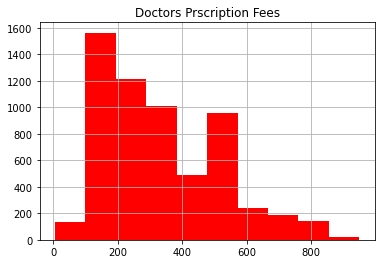

In [100]:
df_train["Fees"].hist(grid=True,color='red')
plt.title("Doctors Prscription Fees")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 [Text(0, 0, '24 years experience'),
  Text(1, 0, '12 years experience'),
  Text(2, 0, '9 years experience'),
  Text(3, 0, '20 years experience'),
  Text(4, 0, '8 years experience'),
  Text(5, 0, '42 years experience'),
  Text(6, 0, '10 years experience'),
  Text(7, 0, '14 years experience'),
  Text(8, 0, '23 years experience'),
  Text(9, 0, '5 years experience'),
  Text(10, 0, '7 years experience'),
  Text(11, 0, '21 years experience'),
  Text(12, 0, '19 years experience'),
  Text(13, 0, '41 years experience'),
  Text(14, 0, '31 years experience'),
  Text(15, 0, '25 years experience'),
  Text(16, 0, '16 years experience'),
  Text(17, 0, '15 years experience'),
  Text(18, 0, '11 years experience'),
  

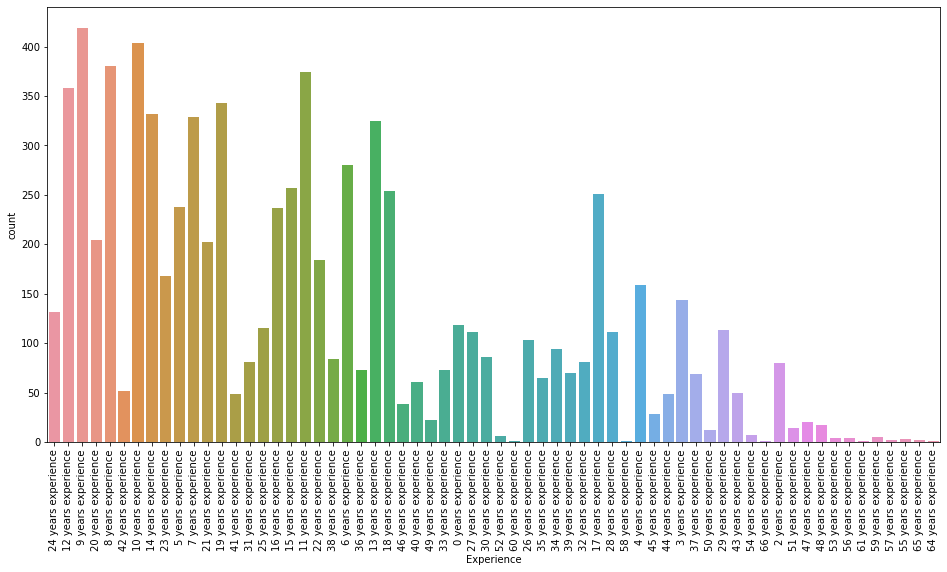

In [118]:
plt.subplots(figsize=(16,8))
sns.countplot(df_concat['Experience'])
plt.xticks(rotation=90)

Observation:
( years and 10 years of experience doctors count seem to be high with others)

<AxesSubplot:xlabel='Rating', ylabel='count'>

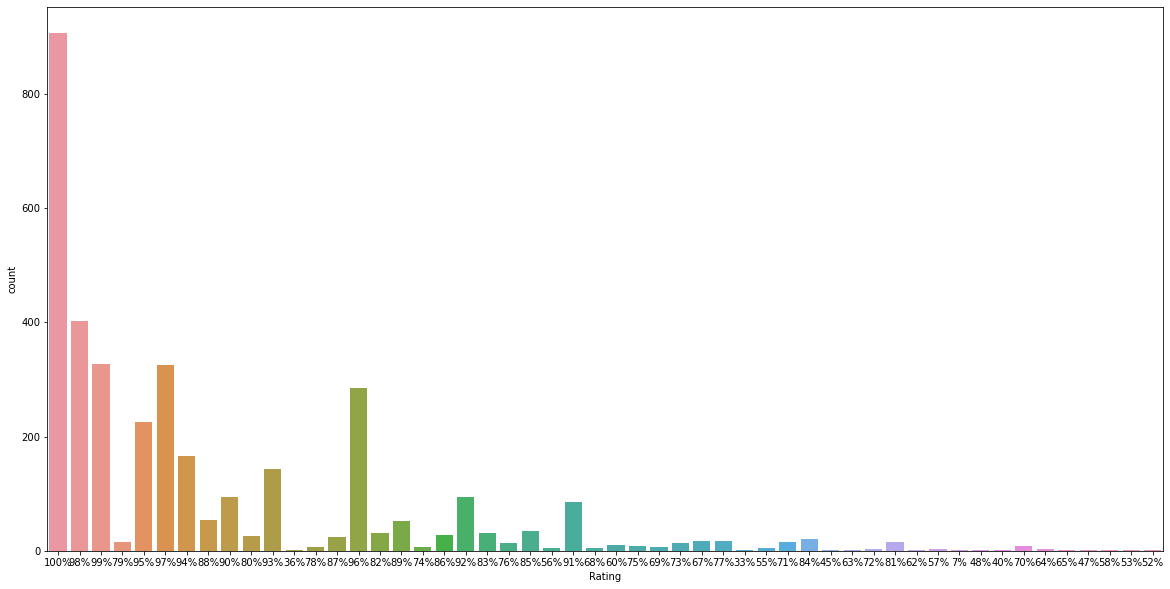

In [110]:
plt.subplots(figsize=(20,10))
sns.countplot(df_concat['Rating'])
#plt.xticks(rotation=90)

<AxesSubplot:xlabel='city', ylabel='count'>

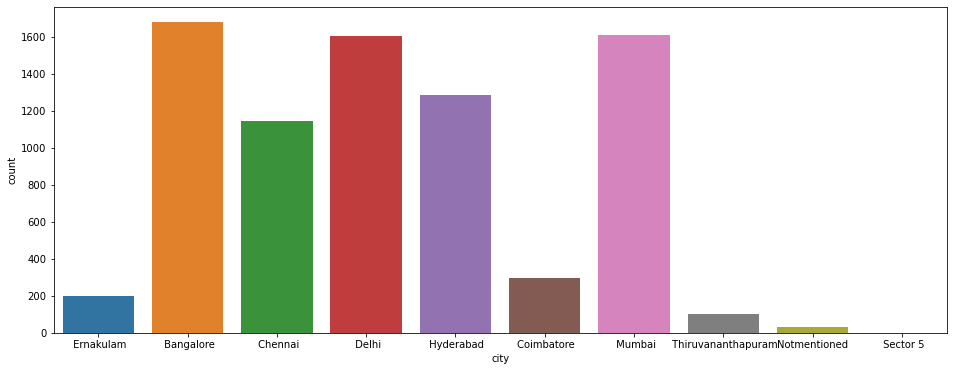

In [120]:
plt.subplots(figsize=(16,6))
sns.countplot(df_encoder['city'])


<AxesSubplot:xlabel='Profile', ylabel='count'>

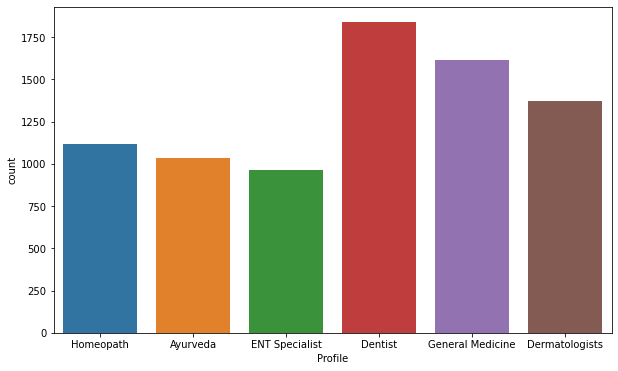

In [122]:
plt.subplots(figsize=(10,6))
sns.countplot(df_encoder['Profile'])

### Bivariate Analysis:

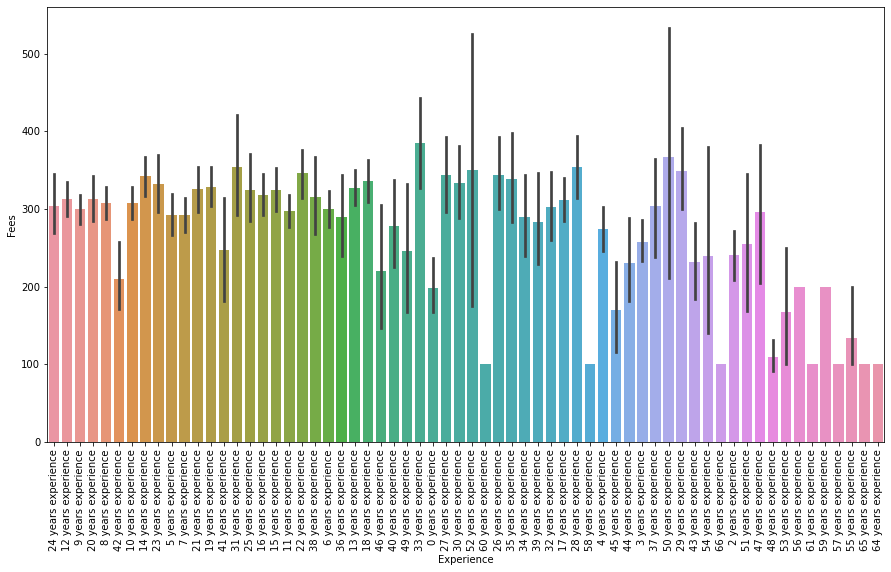

In [137]:
plt.figure(figsize=(15,8))
sns.barplot(x="Experience",y="Fees",data=df_concat)
plt.xticks(rotation=90)
plt.show()

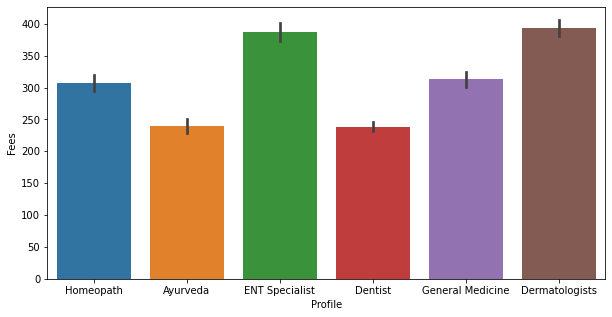

In [129]:
plt.figure(figsize=(10,5))
sns.barplot(x="Profile",y="Fees",data=df_concat)
plt.show()

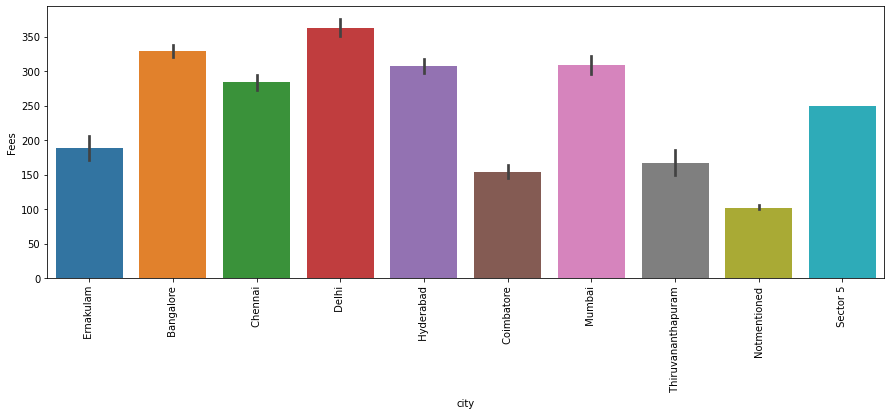

In [139]:
plt.figure(figsize=(15,5))
sns.barplot(x="city",y="Fees",data=df_encoder)
plt.xticks(rotation=90)
plt.show()


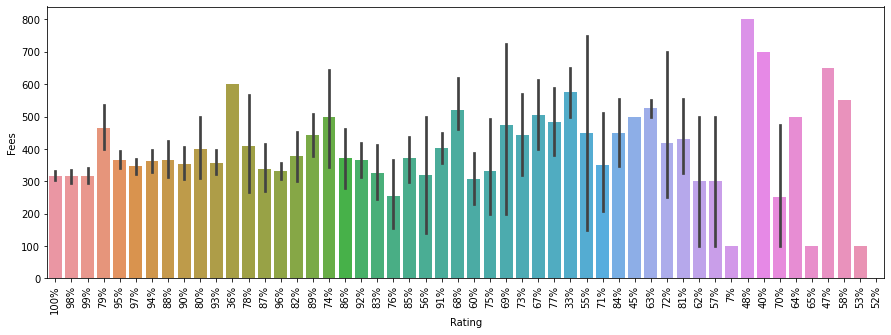

In [136]:
plt.figure(figsize=(15,5))
sns.barplot(x="Rating",y="Fees",data=df_concat)
plt.xticks(rotation=90)
plt.show()

# Multivatiate Analysis:

In [147]:
corr_mat=df_dropped_column.corr()
corr_mat

,Experience,Profile,Fees,dataset_type,locality,city,0,1,2,3,...,7,8,9,10,11,12,13,14,15,16
Experience,1.000000,0.190219,0.002117,-0.022064,0.014677,0.007273,0.206377,0.035005,-0.012369,-0.003004,...,-0.005877,-0.007668,0.004068,-0.013467,-0.013467,-0.013467,-0.013467,-0.013467,-0.013467,-0.013467
Profile,0.190219,1.000000,0.145226,-0.017491,0.012780,-0.006687,0.309841,0.026588,0.020570,0.029566,...,0.017940,0.018596,-0.010226,-0.009874,-0.009874,-0.009874,-0.009874,-0.009874,-0.009874,-0.009874
Fees,0.002117,0.145226,1.000000,NaN,-0.058321,-0.041887,0.234844,0.216729,0.146054,0.091224,...,-0.002293,0.008253,-0.000539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dataset_type,-0.022064,-0.017491,NaN,1.000000,-0.000025,0.009225,-0.011844,-0.010786,-0.014221,-0.001052,...,0.006969,0.010440,0.005767,-0.019429,-0.019429,-0.019429,-0.019429,-0.019429,-0.019429,-0.019429
locality,0.014677,0.012780,-0.058321,-0.000025,1.000000,-0.083129,0.005718,0.016439,-0.021176,-0.019137,...,-0.009185,-0.007292,-0.016412,0.005052,0.005052,0.005052,0.005052,0.005052,0.005052,0.005052
city,0.007273,-0.006687,-0.041887,0.009225,-0.083129,1.000000,-0.030204,-0.063122,-0.050717,-0.001118,...,0.010120,0.014105,-0.010017,-0.000416,-0.000416,-0.000416,-0.000416,-0.000416,-0.000416,-0.000416
0,0.206377,0.309841,0.234844,-0.011844,0.005718,-0.030204,1.000000,0.186439,0.230999,0.104445,...,0.010153,0.007350,0.005305,-0.012127,-0.012127,-0.012127,-0.012127,-0.012127,-0.012127,-0.012127
1,0.035005,0.026588,0.216729,-0.010786,0.016439,-0.063122,0.186439,1.000000,0.280804,0.122253,...,0.004524,-0.003776,-0.007626,0.015911,0.015911,0.015911,0.015911,0.015911,0.015911,0.015911
2,-0.012369,0.020570,0.146054,-0.014221,-0.021176,-0.050717,0.230999,0.280804,1.000000,0.341965,...,0.044618,0.028005,0.001541,0.010916,0.010916,0.010916,0.010916,0.010916,0.010916,0.010916
3,-0.003004,0.029566,0.091224,-0.001052,-0.019137,-0.001118,0.104445,0.122253,0.341965,1.000000,...,0.051761,0.010796,0.008976,0.037130,0.037130,0.037130,0.037130,0.037130,0.037130,0.037130


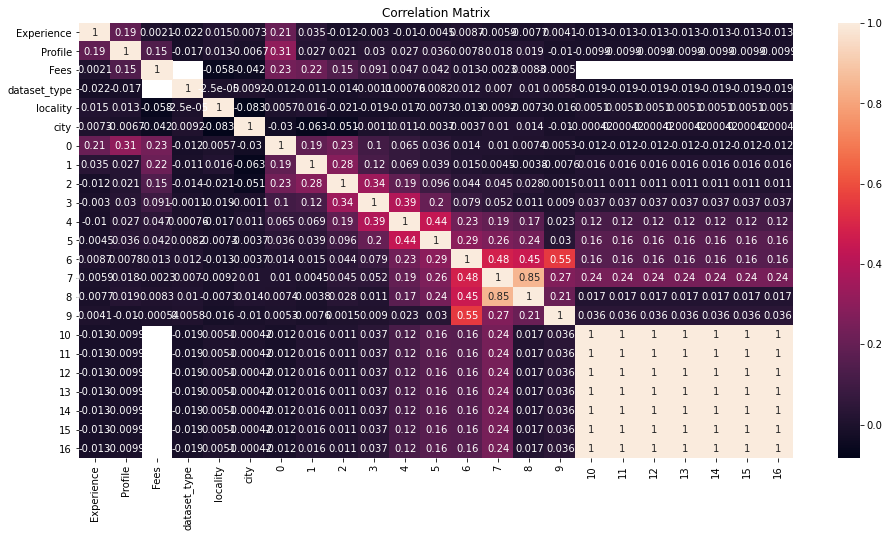

In [148]:
plt.figure(figsize=[16,8])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Lets Check Outliers with Box Plot:

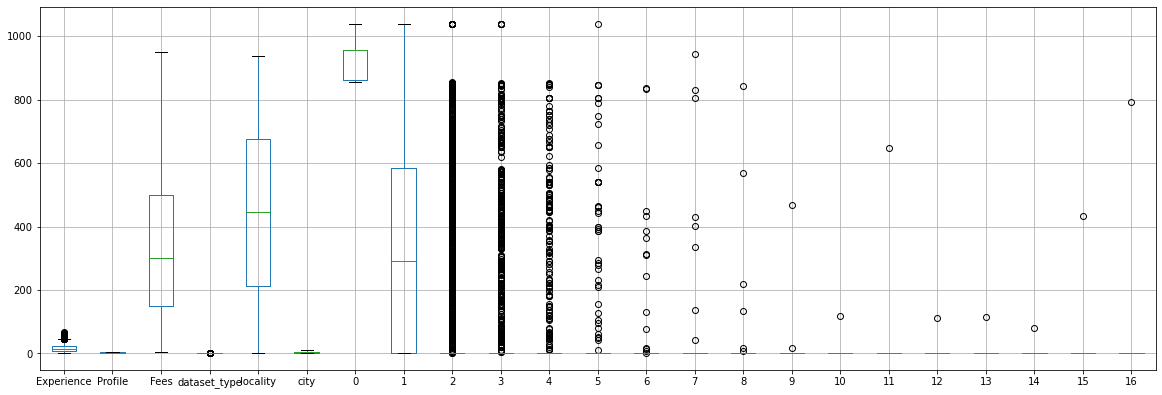

In [53]:
df_dropped_column.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

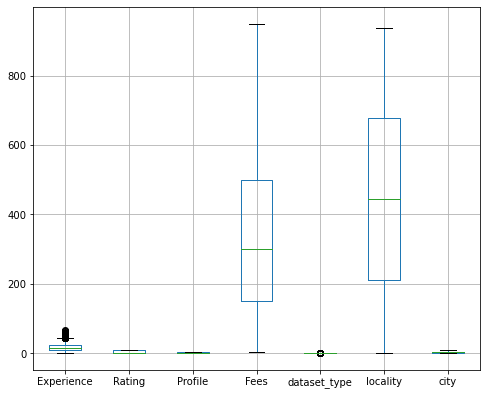

In [62]:
df_dropped_column.iloc[:,0:7].boxplot(figsize=[8,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

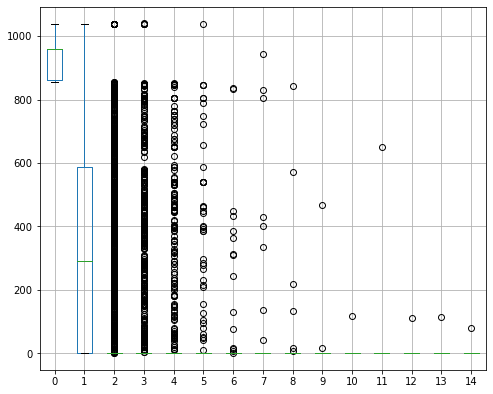

In [61]:
df_dropped_column.iloc[:,7:22].boxplot(figsize=[8,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# Outliers Removal:

In [63]:
from scipy.stats import zscore
z=np.abs(zscore(df_dropped_column))
df_zscore=df_dropped_column[(z<3).all(axis=1)]

In [64]:
df_zscore.shape

(0, 24)

# Skewness Removal:

In [65]:
df_dropped_column.describe()

,Experience,Rating,Profile,Fees,dataset_type,locality,city,0,1,2,...,7,8,9,10,11,12,13,14,15,16
count,7948.000000,7948.000000,7948.000000,5961.000000,7948.00000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,...,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000
mean,17.446653,4.356316,2.458606,307.944640,0.75000,447.979366,3.086688,916.950176,328.733015,108.072974,...,0.493961,0.225340,0.061022,0.014972,0.081656,0.013966,0.014595,0.010191,0.054353,0.099899
std,11.201217,4.865072,1.657217,190.920373,0.43304,277.640009,2.338889,50.834155,292.086403,234.240356,...,18.451644,11.766089,5.252926,1.334806,7.279738,1.245071,1.301155,0.908565,4.845681,8.906182
min,0.000000,0.000000,0.000000,5.000000,0.00000,0.000000,0.000000,856.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,1.000000,150.000000,0.75000,212.750000,1.000000,862.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,0.000000,2.000000,300.000000,1.00000,446.000000,3.000000,958.000000,292.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,10.000000,4.000000,500.000000,1.00000,677.000000,5.000000,958.000000,586.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,66.000000,10.000000,5.000000,950.000000,1.00000,937.000000,10.000000,1037.000000,1039.000000,1039.000000,...,944.000000,842.000000,468.000000,119.000000,649.000000,111.000000,116.000000,81.000000,432.000000,794.000000


In [48]:
#Lets seprate the train and test
df_newtrain=df_dropped_column.loc[df_dropped_column["dataset_type"]==1]
df_newtest=df_dropped_column.loc[df_dropped_column["dataset_type"]==0]
#df_newtest.reset_index(drop=True,inplace=True)

In [49]:
#Lets drop the Fees from test dataset as that is the o/p variable that needs to be predicted
df_newtest.drop(columns=["Fees"],inplace=True)

In [50]:
#lets drop "dataset_type" column from df_newtrain and df_newtest
df_newtrain.drop(columns=["dataset_type"],inplace=True)
df_newtest.drop(columns=["dataset_type"],inplace=True)

In [51]:
#seprating input and output from df_newtrain
x=df_newtrain.drop(columns=["Fees"])
y=df_newtrain[["Fees"]]

In [52]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)
df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [53]:
x=df_skew

In [54]:
x.shape

(5961, 22)

In [55]:
y.shape

(5961, 1)

# Best Random State Checking:

In [56]:
maximum_accuracy=0
maximum_randomstate=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
 #  acc=accuracy_score(y_test,pred)
    acc=(r2_score(y_test,pred))
    if acc>maximum_accuracy:
        maximum_accuracy=acc
        maximum_randomstate=i
print("Best accuracy is  "  ,maximum_accuracy , "  at random_state:", maximum_randomstate)

Best accuracy is   0.15465086629139058   at random_state: 186


In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=maximum_randomstate)

# Model Building:

In [58]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print("Coefficient : ",lm.coef_)
print("Intercept   : ",lm.intercept_)
print("Score       : ",lm.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [[-6.53960543 22.27307407 20.98669019 -8.29807368 -0.02996994 27.54936602
  29.56391964  5.64090889  5.35262889  3.69576974 -5.0198168   3.85506532
  -1.27530068 -3.02317087  0.51106363  0.          0.          0.
   0.          0.          0.          0.        ]]
Intercept   :  [307.94196413]
Score       :  0.11638351328732977
 
error
Mean absolute error    : 143.4412918310256
Mean squared error     : 30518.705689115464
Root mean squared error: 174.69603798917555
 
r2 score :  0.15465086629139058


In [59]:
ls=Lasso(alpha=0.0001) 
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print("Coefficient : ",ls.coef_)
print("Intercept   : ",ls.intercept_)
print("Score       : ",ls.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [-6.53945825 22.27298757 20.98657755 -8.29798165 -0.02988133 27.54930355
 29.56387334  5.64089399  5.35259413  3.69560202 -5.01944371  3.85464227
 -1.2750648  -3.02296299  0.51086222  0.          0.          0.
  0.          0.          0.          0.        ]
Intercept   :  [307.94196681]
Score       :  0.11638351328111007
 
error
Mean absolute error    : 143.44131727517842
Mean squared error     : 30518.709734626595
Root mean squared error: 174.69604956788976
 
r2 score :  0.1546507542332527


In [60]:
rd=Ridge(alpha=0.0001)# to minimize the coefficient varience
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
rd.score(x_train,y_train)
print("Coefficient : ",rd.coef_)
print("Intercept   : ",rd.intercept_)
print("Score       : ",rd.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [[-6.53960508 22.27307361 20.98668981 -8.29807352 -0.02997002 27.54936559
  29.56391914  5.64090918  5.35262884  3.69576963 -5.01981643  3.85506499
  -1.27530061 -3.0231707   0.51106355  0.          0.          0.
   0.          0.          0.          0.        ]]
Intercept   :  [307.94196413]
Score       :  0.11638351328732977
 
error
Mean absolute error    : 143.44129194281174
Mean squared error     : 30518.70570785439
Root mean squared error: 174.69603804280848
 
r2 score :  0.1546508657723339


In [61]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rf.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",rf.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.8839463616117164
 
error
Mean absolute error    : 130.8039753722109
Mean squared error     : 28378.768767113197
Root mean squared error: 168.4599915918115
 
r2 score :  0.2139257857992275


In [62]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
gbr.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",gbr.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.27132166797320545
 
error
Mean absolute error    : 130.95489379314947
Mean squared error     : 26790.613426572392
Root mean squared error: 163.67838411522882
 
r2 score :  0.2579166992736378


In [63]:
adb=AdaBoostRegressor()
adb.fit(x_train,y_train)
pred=adb.predict(x_test)
adb.score(x_train,y_train)
print("Score       : ",adb.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.1253004917345245
 
error
Mean absolute error    : 147.82686690015493
Mean squared error     : 31285.01656216513
Root mean squared error: 176.87570936158852
 
r2 score :  0.13342453253782438


In [64]:
#Pridict the value
pred=lm.predict(x_test)
print("Predicted Wining : ", pred )
print("Actual Wining :", y_test)

Predicted Wining :  [[249.53426611]
 [365.18051052]
 [283.95349897]
 ...
 [366.42004702]
 [196.27450468]
 [322.60846455]]
Actual Wining :        Fees
5778  500.0
4458  200.0
2441  150.0
2882  250.0
864   400.0
3509  100.0
5287  150.0
2971  100.0
3678  500.0
4978  100.0
389   100.0
759   500.0
5959  100.0
2496  500.0
1281  500.0
4657  400.0
5426  100.0
1703  300.0
3714  300.0
900   250.0
5441  600.0
732   250.0
5820  500.0
3705  300.0
5609  300.0
4964  400.0
3124  250.0
3614  300.0
2857  300.0
224   100.0
4006  100.0
3712  350.0
3527  500.0
3153  150.0
2765  200.0
248   250.0
1025  100.0
3549  100.0
1014  800.0
2101  700.0
4564  400.0
2709  500.0
3481  500.0
1781  500.0
1316   10.0
498   100.0
4209  100.0
4086  200.0
1652  700.0
1510  500.0
612   300.0
682   500.0
855   300.0
2224  100.0
4953  500.0
886   300.0
2531  500.0
2027  400.0
2682  100.0
4350  200.0
4362  500.0
4722  200.0
2678  200.0
3240  500.0
325   200.0
2376  300.0
3913  100.0
4792  300.0
617   200.0
1083  100.0
4712  150.

# Cross Validation checking:

In [65]:
scr=cross_val_score(lm,x,y,cv=5,scoring="r2")
print("Cross Validation Score of LinearRegression Model is : ", scr.mean())

Cross Validation Score of LinearRegression Model is :  0.11524302995037053


In [66]:
scr=cross_val_score(ls,x,y,cv=5,scoring="r2")
print("Cross Validation Score of Lasso Model is : ", scr.mean())

Cross Validation Score of Lasso Model is :  0.1152434834434926


In [67]:
scr=cross_val_score(rd,x,y,cv=5,scoring="r2")
print("Cross Validation Score of RidgeRegression Model is : ", scr.mean())

Cross Validation Score of RidgeRegression Model is :  0.11524303076168954


In [68]:
scr=cross_val_score(rf,x,y,cv=5,scoring="r2")
print("Cross Validation Score of RandomForestRegressor Model is : ", scr.mean())

Cross Validation Score of RandomForestRegressor Model is :  0.18683183511110918


In [69]:
scr=cross_val_score(gbr,x,y,cv=5,scoring='r2')
print("Cross Validation Score of GradientBoostingRegressor Model is : ", scr.mean())

Cross Validation Score of GradientBoostingRegressor Model is :  0.21305947443416554


In [70]:
scr=cross_val_score(adb,x,y,cv=5,scoring="r2")
print("Cross Validation Score of AdaBoostRegressor Model is : ", scr.mean())

Cross Validation Score of AdaBoostRegressor Model is :  0.1184927555219634


# Parameter tuning:

### 1st Tuning:
Random Forest Regressor

In [86]:
parameters={"bootstrap":[True,False], "criterion":["mse", "mae"],}

In [87]:
gcv=GridSearchCV(RandomForestRegressor(), parameters,cv=5,scoring='r2') #Tuning

In [88]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae']},
             scoring='r2')

In [89]:
gcv.best_params_

{'bootstrap': True, 'criterion': 'mae'}

In [90]:
mod=RandomForestRegressor(bootstrap= True, criterion='mae',random_state=maximum_randomstate)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

22.145534852193716


### 2nd Tuning:
AdaBoost Regressor

In [81]:
#AdaBoostRegressor
param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

In [82]:
gcv=GridSearchCV(AdaBoostRegressor(), param_dist,cv=5,scoring="r2") #Tuning

In [83]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100]},
             scoring='r2')

In [84]:
gcv.best_params_

{'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 50}

In [85]:
mod2=AdaBoostRegressor(learning_rate= 0.05,loss='exponential',n_estimators= 50,random_state=maximum_randomstate)
mod2.fit(x_train,y_train)
pred=mod2.predict(x_test)
print(r2_score(y_test,pred)*100)

17.931669980693478


# 3rd Tuning:
GradientBoosting Regressor

In [71]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500]}

In [72]:
gcv=GridSearchCV(GradientBoostingRegressor(), parameters,cv=5,scoring="r2") #Tuning

In [73]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]},
             scoring='r2')

In [74]:
gcv.best_params_

{'learning_rate': 0.04, 'n_estimators': 1000, 'subsample': 0.9}

In [75]:
mod3=GradientBoostingRegressor(learning_rate=0.04,n_estimators=1000,subsample= 0.9,random_state=maximum_randomstate)
mod3.fit(x_train,y_train)
pred=mod3.predict(x_test)
print(r2_score(y_test,pred)*100)

28.201997308537983


# 4th Tuning:
Linear Regressor

In [76]:
#Linear Regression:
parameters={"fit_intercept":(True,False), "normalize":(False,True), "copy_X":(True,False)}

In [77]:
gcv=GridSearchCV(LinearRegression(), parameters,cv=5,scoring="r2") #Tuning

In [78]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': (True, False),
                         'fit_intercept': (True, False),
                         'normalize': (False, True)},
             scoring='r2')

In [79]:
gcv.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [80]:
mod4=LinearRegression(copy_X=True,fit_intercept=True,normalize=False)
mod4.fit(x_train,y_train)
pred=mod4.predict(x_test)
print(r2_score(y_test,pred)*100)

15.465086629139059


# Obsevation: GradientBoostingRegressor is the one having a better score of 28%.Lets take this for saving.

# Saving The Model:

In [91]:
import joblib
joblib.dump(mod3,"Doctor_fees.pkl")

['Doctor_fees.pkl']

In [92]:
model=joblib.load("Doctor_fees.pkl")

In [93]:
prediction=model.predict(x_test)

In [94]:
print(r2_score(y_test,prediction)*100)

28.201997308537983


In [95]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [96]:
prediction.to_csv('Doctor_fees.csv') #Saving the predictions

In [97]:
prediction

,0
0,260.898682
1,342.731436
2,259.025848
3,327.175437
4,468.960109
5,329.456244
6,140.770063
7,261.193326
8,409.517768
9,187.553355


# Conclution & Observation:
Hence we have got Best accuracy with GradientBoostingRegressor model. We have saved and loaded that for checking purpose and predicted in above steps.

